# Data Scientist- Challenge

Import all the necessary libraries

In [1]:
import pandas as pd

In [2]:
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [3]:
from sklearn.metrics import f1_score

In [4]:
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from sklearn.metrics import recall_score

Read The data using pandas read_csv function

In [5]:
df=pd.read_csv('data_train.csv')

In [6]:
df.head(10)

,id,num1,num2,num3,num4,num5,num6,num7,num8,num9,...,cat6,cat7,cat8,cat9,cat10,cat11,cat12,cat13,cat14,target
0,0,2,5,0,1,0,0,0,0,0,...,NaN,0,1.0,4,1.0,0,0.0,1,12,0
1,1,1,7,0,0,1,0,0,0,0,...,NaN,0,NaN,11,1.0,1,2.0,1,19,0
2,2,5,9,0,0,1,0,0,0,0,...,NaN,0,NaN,14,1.0,1,2.0,1,60,0
3,3,0,2,1,0,0,0,0,0,0,...,0.0,0,1.0,11,1.0,1,3.0,1,104,0
4,4,0,0,1,0,0,0,0,0,0,...,NaN,0,NaN,14,1.0,1,2.0,1,82,0
5,5,5,4,0,0,0,1,0,0,0,...,NaN,0,0.0,14,1.0,1,0.0,1,104,0
6,6,2,3,0,1,0,0,0,0,0,...,NaN,0,1.0,11,1.0,1,0.0,1,99,0
7,7,5,4,1,0,0,0,0,0,0,...,0.0,0,0.0,11,1.0,1,2.0,1,30,0
8,8,5,3,0,0,1,0,0,0,0,...,NaN,0,1.0,14,1.0,1,0.0,1,68,0
9,9,1,2,0,1,0,0,0,0,0,...,0.0,1,0.0,14,1.0,1,2.0,1,104,1


# Clearly the data had a lot of missing values and as its just two classes lets first analyse the percentage of each class

Plotting the graph for class counts

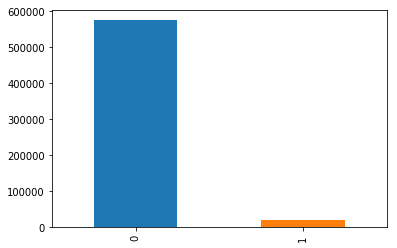

In [7]:
%matplotlib inline
df['target'].value_counts().plot(kind='bar')

In [8]:
Count_0_transacation = len(df[df["target"]==0]) # class 0
Count_1_transacation = len(df[df["target"]==1]) # class 1
Percentage_of_0_transacation = Count_0_transacation/(Count_0_transacation+Count_1_transacation)
print("percentage of 0 transacation is",Percentage_of_0_transacation*100)
Percentage_of_1_transacation= Count_1_transacation/(Count_0_transacation+Count_1_transacation)
print("percentage of 1 transacation",Percentage_of_1_transacation*100)

percentage of 0 transacation is 96.35637583892618
percentage of 1 transacation 3.6436241610738254


The dataset is highly imbalanced!! First lets handle the missing values. Lets start by replacing all the  issing values with 0

In [9]:
df=df.fillna(0)

Divide the dataset into input features x and label y

In [10]:
y=df['target']
x=df.drop(['target'], axis=1)

Up sampling the data so that it becomes balanced.

In [11]:
ros = RandomOverSampler(random_state=0)
ros.fit(x, y)
X_resampled, y_resampled = ros.sample(x, y)

Dividing the data into training and testing part

In [12]:
seed = 7
test_size = 0.33
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=test_size, random_state=seed)

Plotting resampled data to see if it is balanced or not

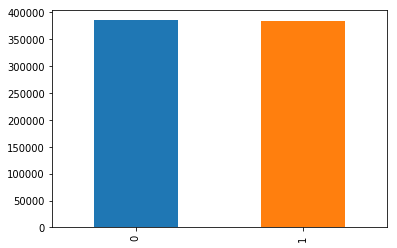

In [13]:
y_resampledser= pd.Series(y_train)
y_resampledser.value_counts().plot(kind='bar')

The dataset is balanced not applying machine learning models to learn the classification

In [14]:
# fit model no training data
model = XGBClassifier()
model.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [15]:
print(model)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)


In [16]:
print('Validation Results')
print("Recall Score: " + str(recall_score(y_test, model.predict(X_test))))

Validation Results


c:\users\pooja\anaconda3\envs\newenv\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Recall Score: 0.5777888865502


In [17]:
y_pred = model.predict(X_test)
predictions = [round(value) for value in y_pred]

c:\users\pooja\anaconda3\envs\newenv\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Accuracy and F1 score

In [18]:
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))
f1score= f1_score(y_test, predictions, average='macro')
print("F1 Score is : "+ str(f1score))

Accuracy: 60.35%
F1 Score is : 0.60331500972245


Confusion Matrix

In [19]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,predictions)

array([[118958,  70030],
       [ 80237, 109803]], dtype=int64)

In [20]:
predictions= pd.Series(predictions)

Plotting the prediction of validation data

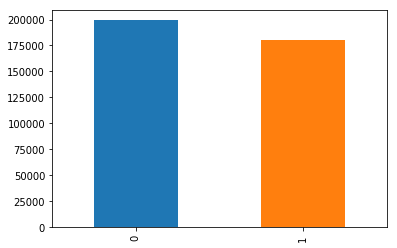

In [21]:
predictions.value_counts().plot(kind='bar')

Actuall validation labels values

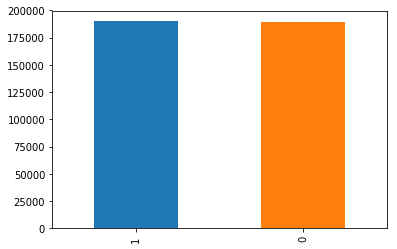

In [22]:
y_test= pd.Series(y_test)
y_test.value_counts().plot(kind='bar')

# Now predicting in the test data

In [23]:
testdata= pd.read_csv('data_test.csv',header=0)

In [24]:
testdata.head()

,id,num1,num2,num3,num4,num5,num6,num7,num8,num9,...,cat5,cat6,cat7,cat8,cat9,cat10,cat11,cat12,cat13,cat14
0,0,0,8,0,1,0,0,0,0,0,...,1.0,NaN,0,NaN,1,1.0,1,2.0,1,65
1,1,4,5,0,0,0,1,0,0,0,...,1.0,NaN,0,0.0,11,1.0,1,0.0,1,103
2,2,5,3,0,0,0,1,0,0,0,...,1.0,NaN,0,NaN,14,1.0,1,2.0,1,29
3,3,0,6,1,0,0,0,0,0,0,...,1.0,NaN,0,NaN,1,1.0,1,2.0,1,40
4,4,5,7,0,0,0,1,0,0,0,...,1.0,NaN,0,NaN,11,1.0,1,2.0,1,101


In [25]:
testdata=testdata.fillna(0)

In [26]:
test=testdata.values

In [27]:
y_pred = model.predict(test)
predictions = [round(value) for value in y_pred]

c:\users\pooja\anaconda3\envs\newenv\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [28]:
predictions= pd.Series(predictions)

In [29]:
predictions=predictions.rename('target')

In [30]:
testoutput= pd.concat([testdata['id'], predictions], axis=1)

Plotting the output distribution

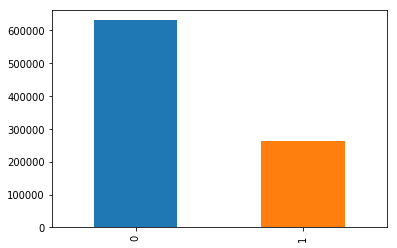

In [31]:
testoutput['target'].value_counts().plot(kind='bar')

Saving prediction to a markdown file

In [32]:
testoutput.to_csv('result.csv', encoding='utf-8', index=False)